<a href="https://colab.research.google.com/github/uanushkatkd/CS6910-Assignment-1/blob/main/Dl1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist


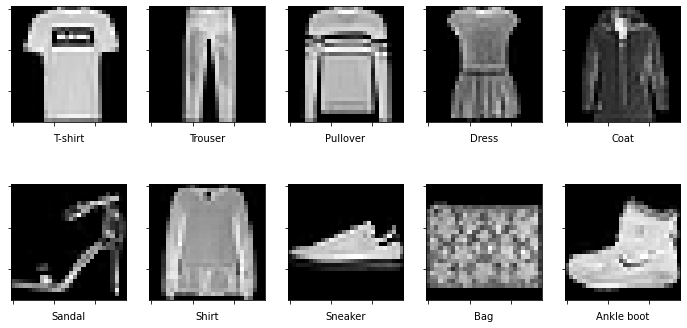

In [52]:
# Loading the fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#class names for fashion-MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# creating 2x5 grid 
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
ax1=ax.flat
for i in range(10):
    # to find first image in the training set with class label i
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    ax1[i].imshow(x_train[idx], cmap='gray')
    ax1[i].set_xlabel(class_names[i])
    ax1[i].set_xticklabels([])
    ax1[i].set_yticklabels([])
    

   
# Display the plot
plt.show()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.0 MB/s eta 0:00:00


In [57]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [58]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

acc,▁▆▆▇▆▇▇█
loss,█▆▂▂▁▁▁▂
acc,0.96182
loss,0.09883
